# Lesson 1:  Reading Files and Plotting Data

Assuming you have acquired some data and need to analyze it, how do we go about processing the data and presenting it?

Fpr loading and procesing, the answer is `numpy.loadtxt` or a similar file loading function. For presentation, the entire `matplotlib.pyplot` library is priceless. You may have also learned of the `scipy` library which is useful in the numerical processing of data.

NOTE: Say these how you wish. I have heard 'num-pie' and 'num-pee', as well as 'sigh-pie' and 'sky-pee'

## Loading a `.csv` file

Look in the DataFolder in the Num_Methods_1 Directory. There should be a file labelled `01_DataA`. Rename it to `01_DataA.csv` in either the jupyter notebook interface or in your own file viewer if it still is a `.txt` File. This is the beauty of many data files you can find online: they have **delimiters** and can be directly changed to a `.csv` file with no extra effort on your part. Additionally, as long as the formatting is correct, most of the python functions do not care what the end of the file name is!

What is a `.csv` file? It is a file full of **Comma Seperated Values** although the **delimiter** which seperates each value in each row of the file does not need to be a comma.

A great site to get some arbitrary data is https://www.ncdc.noaa.gov/cdo-web/datasets as weather allows for a lot of interesting trends with a baseline cyclic pattern. `01_DataA` contains hourly averages of temperature and pressure across North Carolina in one year.

Go to https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html?highlight=loadtxt#numpy.loadtxt and check out the documentation for numpy.loadtxt to solve the following exercise.

### Exercise 1: How can we use it to load in the data in `01_DataA.csv`?

It will help if you open the data file in Notepad or some other text editor and notice the delimiter which seperates the values in each row.

Also, remember the numpy Arrays do not like having multiple data types. Looking at the text file you can see that the first 2 columns have location and hourly times as strings. Let's ignore these for the time being.

Make a two column array of the Pressure and Temperature values in the data file.


In [1]:
#Import library
import numpy as np

#Set up file location as folder+myFile
folder = "DataFolder/"
myFile = "01_DataA.csv"

#Use numpy.loadtxt to get an array of the data in the .csv file
#myArr = np.loadtxt(folder+myFile,---,---,---)
#print(myArr)
myArr = np.loadtxt(folder+myFile,delimiter=',',skiprows=1,usecols=[2,3])
print(myArr)

[[1020.6    4. ]
 [1020.6    3.7]
 [1020.7    3.4]
 ...
 [1021.     5.9]
 [1021.     5.4]
 [1021.     4.9]]


If you print our your array, hopefully it looks like: 


`[[1020.6    4. ]
 [1020.6    3.7]
 [1020.7    3.4]
 ...
 [1021.     5.9]
 [1021.     5.4]
 [1021.     4.9]]` 
 
If not, mess with the optional parameters shown in the `loadtxt` documentation until your array looks like the above. 

(Hint: You will need 3 optional parameters to get the above array)


### Exercise 2: What about loading text (strings) instead of numbers?

Let's say we don't know the data was taken hourly and we want the exact dates and times recorded in the data file. These are in the second column, but they are stored as a weird string. For example: 

`09-24T05:00:00`

Where by looking at the data we can conlcude the first two digits give the month, the dash seperates those digits from the digits giving the day of the month, and `T` denotes that the values after it are time of day.

Using that information, how can we get an array of the times of each data measurement in days since 0:00am January 1st, an hour before the first data point in the file? (Note: no need to make this code general for any year. This data is in 2010, so no leap year.)



In [5]:
#Note that we still need optional parameters delimiter, usecols, and skiprows
#I have already filled in the dtype argument for you.
#timeData = np.loadtxt(folder+myFile,dtype='str',---,---,---)
timeData = np.loadtxt(folder+myFile,dtype='str',delimiter=',',skiprows=1,usecols=[1])

#Once you have an array of strings in timeData, we need to take each string and translate it 
#to a number. Let's make an empty array to put these values in
timeArr = np.zeros(len(timeData))

#This array is useful for counting the number of days since Jan 1st 0:00am
daysPerMonth = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

#Treat January as month 0, Feb as month 1, etc.
for i in range(0,len(timeData)):
    myStr = timeData[i]
    #Replace each # with the correct index to grab the correct part of the time string
    #what datatype do we need mnth to be since we use it as an index to sum over the daysPerMonth array? 
    #Replace DTYPE with float,int,str, or something else
    #mnth = DTYPE(myStr[#:#]) - 1
    #day = float(myStr[#:#]) - 1
    #hrs = float(myStr[#:#])
    #time = day+hrs/24.0
    mnth = int(myStr[0:2]) - 1
    day = float(myStr[3:5]) - 1
    hrs = float(myStr[6:8])
    time = day+hrs/24.0
    time += np.sum(daysPerMonth[:mnth])
    
    #To check your work, you can print this. 
    #Scroll down the output to 12-01T00:00:00 and the time variable should be 334
    #print(myStr + ' ' +format(time,'2.4e'))
    timeArr[i] = time

print(myArr.shape)

(8759, 2)


## Plotting Data

Now let's plot our data and learn what we can from it! 

We are going to need the `matplotlib.pyplot` library that you hopefully imported during terminal work in the `Intro_To_Python` lessons. 

The beauty of this library is that it has a `plot` function! Wow! This is too easy:

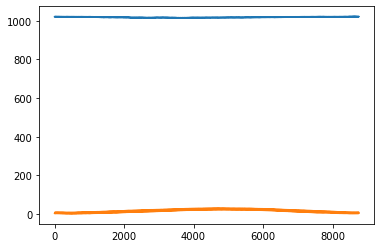

In [4]:
import matplotlib.pyplot as plt

plt.plot(myArr)

Well that was disappointing. I can't tell much from that plot at all! Why is one line blue? And why is the other orange? And why does the bottom range from 0 to ~9000?? And what is with the brackets and angles and `lines.Line2D`? These are great questions which all have detailed answers, because:

**Your code only does things you told it to do.**

What did you tell it to do? Let's look at the documentation: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html

We used the implementation

`plot(y)`

which says that the function puts each value of the 1D `y` array paired with its index (the array `numpy.arange(0,len(y))`).

However, our `myArr` has 2 dimensions! It has 2 columns and 8759 rows. So what did `plot` do? It treated each column as a single, 1D array and plotted each column against its corresponding indices. Then it automatically changed the color of the second column data (the default color is always blue for plotting in matplotlib). 

However, using this form of `plot` is misleading because the variation and scale of our 2 datasets (Pressure and Temperature) is quite different. Therefore, we will most likely need *seperate* plots for each of the datasets.